In [48]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import datetime
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/train.csv' # TODO: download train data and supply path here 
y, tX, tXt, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape)

(250000,) (250000, 30)


In [50]:
threshold_irr = 0.5
threshold_corr = 0.8
data_reduce_list, y_list, rmv_feat_idx_list = data_train_preprocessing(tX, y, threshold_irr, threshold_corr, show_plot=False)

/Users/AntoineDaeniker/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/AntoineDaeniker/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


train data 0 shape : (99913, 16)
train data 1 shape : (77544, 19)
train data 2 shape : (50379, 23)
train data 3 shape : (22164, 25)


In [51]:
max_iters = 500
gamma = 2*10**(-9)
batch_size = 1

# Initialization
#w_initial = np.random.rand(new_data.shape[1])
w_list = []
loss_list = []

for data, y in zip(data_reduce_list, y_list):
    
    w_initial = np.zeros(data.shape[1])
    
    # Start SGD.
    start_time = datetime.datetime.now()
    sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, data, w_initial, batch_size, max_iters, gamma)
    end_time = datetime.datetime.now()
    
    w_list.append(sgd_ws)
    loss_list.append(sgd_losses)

    
    # Print result
    exection_time = (end_time - start_time).total_seconds()
    print("\nSGD: execution time={t:.3f} seconds, gamma = {gamma}\n".format(t=exection_time, gamma=gamma))

Gradient Descent(499/499): loss=0.5000004028213397, normgrad=4.18700294323736637
SGD: execution time=7.148 seconds, gamma = 2e-09

Gradient Descent(499/499): loss=0.5000009852450402, normgrad=4.20627591429000816
SGD: execution time=5.949 seconds, gamma = 2e-09

Gradient Descent(499/499): loss=0.49999874909067676, normgrad=4.3345179961015796
SGD: execution time=4.360 seconds, gamma = 2e-09

Gradient Descent(499/499): loss=0.49999946118988864, normgrad=4.7076822620300005
SGD: execution time=2.093 seconds, gamma = 2e-09



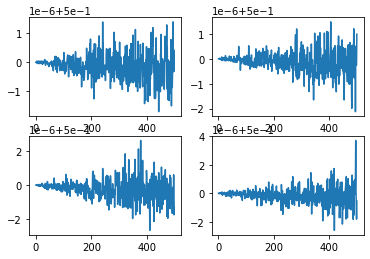

In [52]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(np.arange(max_iters), loss_list[0])
axs[0, 1].plot(np.arange(max_iters), loss_list[1])
axs[1, 0].plot(np.arange(max_iters), loss_list[2])
axs[1, 1].plot(np.arange(max_iters), loss_list[3])

In [53]:
DATA_TEST_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, tXt_test, ids_test = load_csv_data(DATA_TEST_PATH)
print(tX_test.shape, y_test.shape)

(568238, 30) (568238,)


In [54]:
data_list_test, y_list_test, feat_ind = subdivide_data(tX_test, y_test)

In [55]:
new_data_test_list = []
for rmv_feat_idx, data_test in zip(rmv_feat_idx_list, data_list_test):
    #print("111111111111111", data_test)
    data_test_reduce = np.delete(data_test, rmv_feat_idx, axis=1)
    #print("222222222222222", data_test_reduce)
    norm_data_test_reduce, _ = normalize_data(data_test_reduce)
    #print("333333333333333", norm_data_test_reduce)
    print(norm_data_test_reduce.shape)
    
    new_data_test_list.append(norm_data_test_reduce)

(227458, 16)
(175338, 19)
(114648, 23)
(50794, 25)


In [56]:
pred_test = 0
for w, new_data_test, y in zip(w_list, new_data_test_list, y_list_test):
    pred = predict_labels(w, new_data_test)
    pred_test += len(pred[abs(pred - y) == 0]) * 100 / len(y_test)
    #len(pred_test[abs(pred_test-y_test) == 0]) * 100 / len(y_test)

In [57]:
pred_test

49.972018766784345